In [1]:
import pandas as pd
import pybaseball

pybaseball.cache.enable()

In [2]:
nyy_2025 = pybaseball.schedule_and_record(2025, "NYY")
print(nyy_2025.head())

http://www.baseball-reference.com/teams/NYY/2025-schedule-scores.shtml
               Date   Tm Home_Away  Opp W/L     R   RA  Inn  W-L  Rank  \
1  Thursday, Mar 27  NYY      Home  MIL   W   4.0  2.0  9.0  1-0   1.0   
2  Saturday, Mar 29  NYY      Home  MIL   W  20.0  9.0  9.0  2-0   1.0   
3    Sunday, Mar 30  NYY      Home  MIL   W  12.0  3.0  9.0  3-0   1.0   
4    Tuesday, Apr 1  NYY      Home  ARI   L   5.0  7.0  9.0  3-1   2.0   
5  Wednesday, Apr 2  NYY      Home  ARI   L   3.0  4.0  9.0  3-2   3.0   

       GB     Win     Loss      Save  Time D/N  Attendance   cLI  Streak  \
1    Tied   Rodón  Peralta  Williams  3:08   D     46208.0   .90       1   
2  up 0.5   Gómez   Cortés      None  3:05   D     46683.0   .91       2   
3  up 1.0    Hill   Civale      None  2:41   D     41803.0   .96       3   
4     0.5  Miller   Leiter       Puk  2:53   N     37482.0  1.00      -1   
5     1.0  Gallen    Rodón       Puk  2:34   N     40558.0   .96      -2   

  Orig. Scheduled  
1      

/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


In [3]:
nyy_2025["rdiff"] = nyy_2025["R"] - nyy_2025["RA"]
print(nyy_2025.head())

               Date   Tm Home_Away  Opp W/L     R   RA  Inn  W-L  Rank  ...  \
1  Thursday, Mar 27  NYY      Home  MIL   W   4.0  2.0  9.0  1-0   1.0  ...   
2  Saturday, Mar 29  NYY      Home  MIL   W  20.0  9.0  9.0  2-0   1.0  ...   
3    Sunday, Mar 30  NYY      Home  MIL   W  12.0  3.0  9.0  3-0   1.0  ...   
4    Tuesday, Apr 1  NYY      Home  ARI   L   5.0  7.0  9.0  3-1   2.0  ...   
5  Wednesday, Apr 2  NYY      Home  ARI   L   3.0  4.0  9.0  3-2   3.0  ...   

      Win     Loss      Save  Time D/N Attendance   cLI Streak  \
1   Rodón  Peralta  Williams  3:08   D    46208.0   .90      1   
2   Gómez   Cortés      None  3:05   D    46683.0   .91      2   
3    Hill   Civale      None  2:41   D    41803.0   .96      3   
4  Miller   Leiter       Puk  2:53   N    37482.0  1.00     -1   
5  Gallen    Rodón       Puk  2:34   N    40558.0   .96     -2   

   Orig. Scheduled rdiff  
1             None   2.0  
2             None  11.0  
3             None   9.0  
4             None  

In [7]:
rdiff_in_W = nyy_2025.loc[nyy_2025["W/L"] == "W", "rdiff"].mean()
print(f"rdiff_in_W: {rdiff_in_W}")
rdiff_in_L = nyy_2025.loc[nyy_2025["W/L"] == "L", "rdiff"].mean()
print(f"rdiff_in_L: {rdiff_in_L}")

print(f"FOF: {rdiff_in_W - rdiff_in_L}")


rdiff_in_W: 4.314606741573034
rdiff_in_L: -3.5245901639344264
FOF: 7.83919690550746


In [12]:
from tqdm import tqdm

teams_2025 = nyy_2025["Opp"].unique().tolist()
teams_2025.append("NYY")
print(teams_2025)

['MIL', 'ARI', 'PIT', 'DET', 'SFG', 'KCR', 'TBR', 'CLE', 'TOR', 'BAL', 'SDP', 'ATH', 'SEA', 'NYM', 'TEX', 'COL', 'LAA', 'LAD', 'BOS', 'CIN', 'CHC', 'ATL', 'PHI', 'MIA', 'HOU', 'MIN', 'STL', 'WSN', 'CHW', 'NYY']


In [13]:
import time

In [14]:
fof_values: dict[str, float] = {}

for team in tqdm(teams_2025, desc="processing team seasons"):
    time.sleep(1)
    team_data = pybaseball.schedule_and_record(2025, team)
    team_data["rdiff"] = team_data["R"] - team_data["RA"]
    rdiff_in_W = team_data.loc[team_data["W/L"] == "W", "rdiff"].mean()
    rdiff_in_L = team_data.loc[team_data["W/L"] == "L", "rdiff"].mean()
    fof_values[team] = rdiff_in_W - rdiff_in_L

print(fof_values)


processing team seasons:   0%|          | 0/30 [00:00<?, ?it/s]

http://www.baseball-reference.com/teams/MIL/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:   3%|▎         | 1/30 [00:01<00:38,  1.32s/it]

http://www.baseball-reference.com/teams/ARI/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:   7%|▋         | 2/30 [00:07<01:53,  4.04s/it]

http://www.baseball-reference.com/teams/PIT/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  10%|█         | 3/30 [00:13<02:12,  4.92s/it]

http://www.baseball-reference.com/teams/DET/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  13%|█▎        | 4/30 [00:19<02:19,  5.36s/it]

http://www.baseball-reference.com/teams/SFG/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  17%|█▋        | 5/30 [00:25<02:19,  5.57s/it]

http://www.baseball-reference.com/teams/KCR/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  20%|██        | 6/30 [00:31<02:17,  5.73s/it]

http://www.baseball-reference.com/teams/TBR/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  23%|██▎       | 7/30 [00:37<02:13,  5.82s/it]

http://www.baseball-reference.com/teams/CLE/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  27%|██▋       | 8/30 [00:43<02:09,  5.87s/it]

http://www.baseball-reference.com/teams/TOR/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  30%|███       | 9/30 [00:49<02:04,  5.94s/it]

http://www.baseball-reference.com/teams/BAL/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  33%|███▎      | 10/30 [00:55<01:58,  5.92s/it]

http://www.baseball-reference.com/teams/SDP/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  37%|███▋      | 11/30 [01:01<01:53,  5.95s/it]

http://www.baseball-reference.com/teams/ATH/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  40%|████      | 12/30 [01:07<01:47,  5.99s/it]

http://www.baseball-reference.com/teams/SEA/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  43%|████▎     | 13/30 [01:13<01:41,  5.97s/it]

http://www.baseball-reference.com/teams/NYM/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  47%|████▋     | 14/30 [01:19<01:35,  5.99s/it]

http://www.baseball-reference.com/teams/TEX/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  50%|█████     | 15/30 [01:25<01:29,  5.98s/it]

http://www.baseball-reference.com/teams/COL/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  53%|█████▎    | 16/30 [01:31<01:23,  5.98s/it]

http://www.baseball-reference.com/teams/LAA/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  57%|█████▋    | 17/30 [01:37<01:18,  6.01s/it]

http://www.baseball-reference.com/teams/LAD/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  60%|██████    | 18/30 [01:43<01:11,  5.99s/it]

http://www.baseball-reference.com/teams/BOS/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  63%|██████▎   | 19/30 [01:49<01:06,  6.01s/it]

http://www.baseball-reference.com/teams/CIN/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  67%|██████▋   | 20/30 [01:55<01:00,  6.00s/it]

http://www.baseball-reference.com/teams/CHC/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  70%|███████   | 21/30 [02:01<00:53,  5.98s/it]

http://www.baseball-reference.com/teams/ATL/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  73%|███████▎  | 22/30 [02:07<00:48,  6.03s/it]

http://www.baseball-reference.com/teams/PHI/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  77%|███████▋  | 23/30 [02:13<00:41,  5.98s/it]

http://www.baseball-reference.com/teams/MIA/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  80%|████████  | 24/30 [02:19<00:36,  6.01s/it]

http://www.baseball-reference.com/teams/HOU/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  83%|████████▎ | 25/30 [02:25<00:29,  5.99s/it]

http://www.baseball-reference.com/teams/MIN/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  87%|████████▋ | 26/30 [02:31<00:23,  5.99s/it]

http://www.baseball-reference.com/teams/STL/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  90%|█████████ | 27/30 [02:37<00:18,  6.02s/it]

http://www.baseball-reference.com/teams/WSN/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons:  93%|█████████▎| 28/30 [02:43<00:11,  5.99s/it]

http://www.baseball-reference.com/teams/CHW/2025-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing team seasons: 100%|██████████| 30/30 [02:50<00:00,  5.68s/it]

{'MIL': np.float64(8.022467481277099), 'ARI': np.float64(7.111486486486486), 'PIT': np.float64(7.149477682811016), 'DET': np.float64(8.272393923520168), 'SFG': np.float64(6.857528957528958), 'KCR': np.float64(6.9166197183098586), 'TBR': np.float64(7.096681096681097), 'CLE': np.float64(6.917627054600415), 'TOR': np.float64(8.321008403361343), 'BAL': np.float64(8.35620743844945), 'SDP': np.float64(6.967479674796748), 'ATH': np.float64(9.26773539708863), 'SEA': np.float64(7.522177419354838), 'NYM': np.float64(7.452957746478873), 'TEX': np.float64(7.553140096618357), 'COL': np.float64(7.287043340140686), 'LAA': np.float64(7.255275443510738), 'LAD': np.float64(7.467980295566502), 'BOS': np.float64(7.888865233127529), 'CIN': np.float64(7.245685821028287), 'CHC': np.float64(7.999286987522282), 'ATL': np.float64(7.633990610328638), 'PHI': np.float64(7.47948717948718), 'MIA': np.float64(7.167032967032966), 'HOU': np.float64(7.876515151515152), 'MIN': np.float64(8.359437751004016), 'STL': np.flo

In [ ]:
import matplotlib.pyplot as plt

# sort the fof_values in descending order
fof_values = dict(sorted(fof_values.items(), key=lambda item: item[1], reverse=True))


In [54]:
import matplotlib as mpl

mpl.rcParams["font.family"] = "monospace"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["xtick.labelsize"] = 8
mpl.rcParams["ytick.labelsize"] = 8

In [61]:
import numpy as np

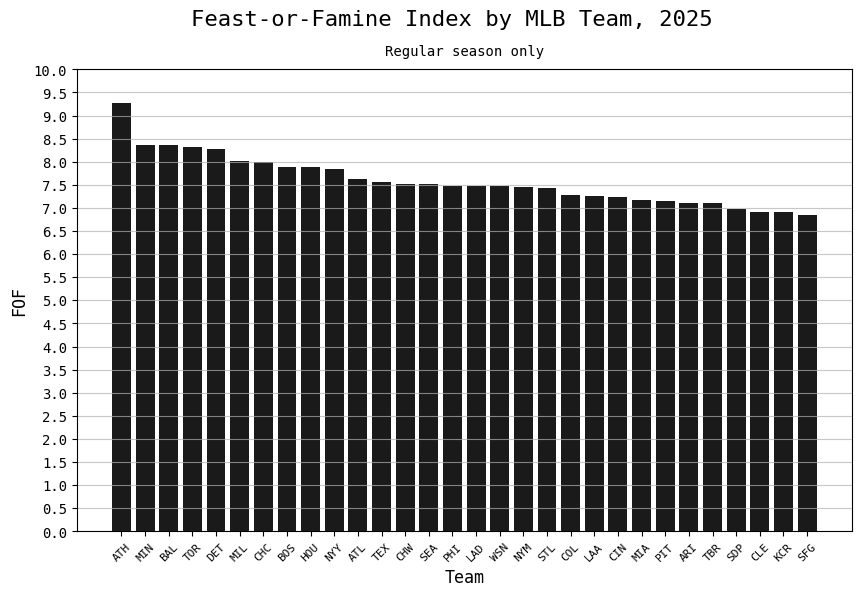

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.grid(True, axis="y", linestyle="-", alpha=0.7)

ax.bar(fof_values.keys(), fof_values.values(), color="0.1", width=0.8, )

fig.suptitle("Feast-or-Famine Index by MLB Team, 2025", fontsize=16)

ax.set_xlabel("Team")
ax.set_ylabel("FOF")
ax.set_title("Regular season only", fontsize=10, pad=10)


plt.xticks(
    rotation=45,
    ha="center",
    fontsize=8
)

plt.yticks(
    np.linspace(0, 10, 21),
    fontsize=10
)

plt.show()

In [78]:
fig.savefig("../assets/fof_2025.png")

In [80]:
pybaseball.cache.enable()

fof_values: dict[int, float] = {}

for year in tqdm(range(1998, 2026)):
    time.sleep(1)
    nyy_season = pybaseball.schedule_and_record(year, "NYY")
    nyy_season["rdiff"] = nyy_season["R"] - nyy_season["RA"]
    rdiff_in_W = nyy_season.loc[nyy_season["W/L"] == "W", "rdiff"].mean()
    rdiff_in_L = nyy_season.loc[nyy_season["W/L"] == "L", "rdiff"].mean()
    fof_values[year] = rdiff_in_W - rdiff_in_L

print(fof_values)

 39%|███▉      | 11/28 [00:11<00:17,  1.02s/it]

http://www.baseball-reference.com/teams/NYY/2009-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 43%|████▎     | 12/28 [00:12<00:17,  1.09s/it]

http://www.baseball-reference.com/teams/NYY/2010-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 46%|████▋     | 13/28 [00:18<00:39,  2.60s/it]

http://www.baseball-reference.com/teams/NYY/2011-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 50%|█████     | 14/28 [00:24<00:50,  3.61s/it]

http://www.baseball-reference.com/teams/NYY/2012-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 54%|█████▎    | 15/28 [00:30<00:57,  4.39s/it]

http://www.baseball-reference.com/teams/NYY/2013-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 57%|█████▋    | 16/28 [00:36<00:57,  4.80s/it]

http://www.baseball-reference.com/teams/NYY/2014-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 61%|██████    | 17/28 [00:42<00:56,  5.15s/it]

http://www.baseball-reference.com/teams/NYY/2015-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 64%|██████▍   | 18/28 [00:48<00:54,  5.41s/it]

http://www.baseball-reference.com/teams/NYY/2016-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 68%|██████▊   | 19/28 [00:54<00:51,  5.70s/it]

http://www.baseball-reference.com/teams/NYY/2017-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 71%|███████▏  | 20/28 [01:00<00:45,  5.68s/it]

http://www.baseball-reference.com/teams/NYY/2018-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 75%|███████▌  | 21/28 [01:06<00:40,  5.79s/it]

http://www.baseball-reference.com/teams/NYY/2019-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 79%|███████▊  | 22/28 [01:12<00:35,  5.84s/it]

http://www.baseball-reference.com/teams/NYY/2020-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behav

http://www.baseball-reference.com/teams/NYY/2021-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 86%|████████▌ | 24/28 [01:24<00:23,  5.96s/it]

http://www.baseball-reference.com/teams/NYY/2022-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 89%|████████▉ | 25/28 [01:30<00:17,  5.93s/it]

http://www.baseball-reference.com/teams/NYY/2023-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
 93%|█████████▎| 26/28 [01:36<00:11,  5.96s/it]

http://www.baseball-reference.com/teams/NYY/2024-schedule-scores.shtml


/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
100%|██████████| 28/28 [01:43<00:00,  3.69s/it]

{1998: np.float64(8.037582024259297), 1999: np.float64(7.84952144629564), 2000: np.float64(8.779774872912128), 2001: np.float64(7.764738393515106), 2002: np.float64(7.686161776367962), 2003: np.float64(8.315972222222221), 2004: np.float64(8.56952887537994), 2005: np.float64(8.163800904977375), 2006: np.float64(8.20934650455927), 2007: np.float64(8.988251155624038), 2008: np.float64(8.198106060606062), 2009: np.float64(8.54335016835017), 2010: np.float64(7.450659133709981), 2011: np.float64(7.22758358662614), 2012: np.float64(6.445537340619308), 2013: np.float64(6.713253882267967), 2014: np.float64(6.475362318840579), 2015: np.float64(7.552710843373494), 2016: np.float64(7.077449947312961), 2017: np.float64(7.465474060822898), 2018: np.float64(7.399410464259396), 2019: np.float64(7.7430316914852995), 2020: np.float64(8.358333333333333), 2021: np.float64(7.1613033798826145), 2022: np.float64(6.897590361445783), 2023: np.float64(7.609896219421794), 2024: np.float64(7.997491039426523), 202

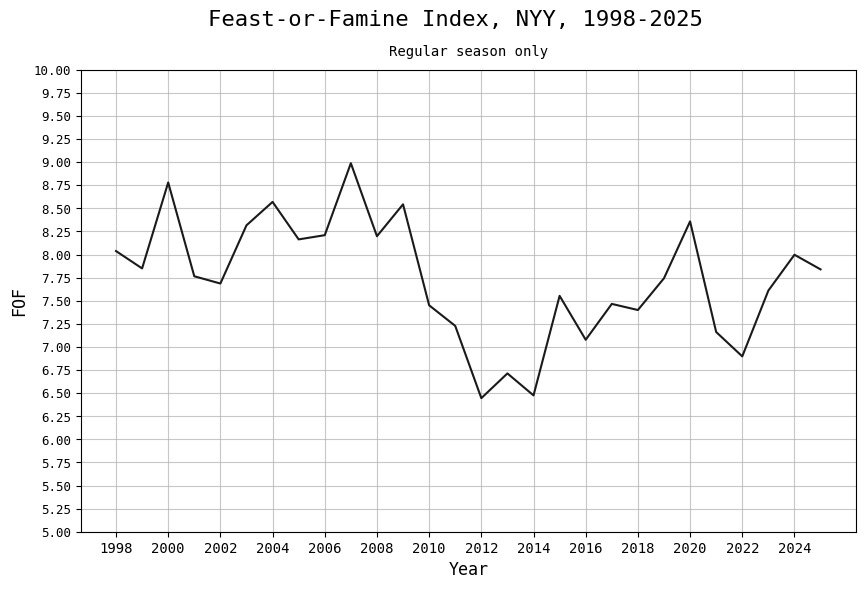

In [89]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(fof_values.keys(), fof_values.values(), color="0.1",)

ax.grid(True, axis="both", linestyle="-", alpha=0.7)

fig.suptitle("Feast-or-Famine Index, NYY, 1998-2025", fontsize=16)

ax.set_xlabel("Year")
ax.set_ylabel("FOF")
ax.set_title("Regular season only", fontsize=10, pad=10)

plt.xticks(
    range(1998, 2026, 2),
    fontsize=10
)

plt.yticks(
    np.linspace(5, 10, 21),
    fontsize=9
)

plt.show()

In [90]:
fig.savefig("../assets/fof_nyy_1998_2025.png")

In [102]:
all_teams_1998 = pybaseball.team_pitching(1998)

all_team_names_1998 = all_teams_1998["Team"].unique().tolist()
print(all_team_names_1998)


['ATL', 'HOU', 'SDP', 'NYM', 'LAD', 'NYY', 'PIT', 'SFG', 'BOS', 'TOR', 'STL', 'TBD', 'MON', 'CIN', 'CLE', 'ANA', 'CHC', 'MIL', 'ARI', 'PHI', 'BAL', 'MIN', 'OAK', 'DET', 'SEA', 'TEX', 'COL', 'KCR', 'FLA', 'CHW']


In [ ]:
fof_means: dict[int, float] = {}

for season in tqdm(range(1998, 2026), desc="processing seasons"):
    # get all teams this season
    all_teams_this_season = pybaseball.team_pitching(season)["Team"].unique().tolist()

    fof_values: dict[str, float] = {}
    
    for team in tqdm(all_teams_this_season, desc="processing teams"):
        team_data = pybaseball.team_pitching(season, team)
        team_data["rdiff"] = team_data["R"] - team_data["RA"]
        rdiff_in_W = team_data.loc[team_data["W/L"] == "W", "rdiff"].mean()
        rdiff_in_L = team_data.loc[team_data["W/L"] == "L", "rdiff"].mean()
        fof_values[team] = rdiff_in_W - rdiff_in_L

    fof_means[season] = sum(fof_values.values()) / len(fof_values)



  Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0 Unnamed: 4_level_0  \
                Game               Date               Home                Opp   
0                  1         1998-04-01              False                ANA   
1                  2         1998-04-02              False                ANA   
2                  3         1998-04-04              False                OAK   
3                  4         1998-04-05              False                OAK   
4                  5         1998-04-06              False                SEA   

  Score            Batting Stats      ...                                      \
   Rslt RS  RA Inn            PA  AB  ... SH SF ROE IBB  BAbip LOB NumPlayers   
0     L  1   4   9            36  29  ...  0  0   0   0  0.238   8         10   
1     L  2  10   9            39  31  ...  0  1   0   0  0.259  10         11   
2     L  3   7   9            35  31  ...  0  0   0   0  0.320   5          9   
3     W  9   7  10         

/home/charon-labs/baseball-analytica/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_game_logs.py:39: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors="ignore")
